In [1]:
#References
#https://rnaseq.uoregon.edu/#analysis-aligning-to-a-transcriptome
#https://www.biostars.org/p/212687/
#https://www.biostars.org/p/124298/
#https://www.researchgate.net/post/How_can_I_combine_forward_and_reverse_illumina_reads_in_one_fragment_recruitment_analysis

In [1]:
import pickle
from Bio import SeqIO
from collections import defaultdict
import collections
import matplotlib.pyplot as plt

In [2]:
k = 11

In [3]:
#### Pickle Module to save and load dictionary later on

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
# d = load_obj('genome_index_full')

In [6]:
r1_list = []
r1_str= " "
for record in SeqIO.parse('fastq dataset', "fastq"):
#     print(record.seq)
    if record.seq != ' ':
        r1_list.append(str(record.seq).replace('N',''))

In [7]:
# r2_list = []
# r2_str= " "
# for record in SeqIO.parse("10000_R2.fastq", "fastq"):
# #     print(record.seq)
#     if record.seq != ' ':
#         r2_list.append(str(record.seq).replace('N',''))

In [8]:
len(r1_list)

10000

In [9]:
print(len(r1_list[2]))
r1_list[2] #RANDOM TEST OF MEMORY

36


'TCTCGCATACGCGATCATATTTCACCCTATAATATG'

In [10]:
reference_list = []
reference_str= " "

for record in SeqIO.parse('fasta dataset', "fasta"):
    if record.seq != ' ':
        reference_list.append(record.seq)
reference_str = ''.join(map(str, reference_list)).upper()

In [11]:
top_score = [0] * len(r1_list)

for z in range(len(r1_list)):    
# for z in range(100,200):
    read = r1_list[z]
    correct = 0
    ref = ''

    s = read[:11]
    if s in d:
        indices = d[s]
        print('\n\nThe seed at index: ' + str(z)+ ' is: ' + s)
        print('There are ' + str(len(indices)) + ' matches for read at index: ' + str(z))
        for index in indices:
            ref = reference_str[index:index+len(read)]
            for x in range(len(ref)):
                if ref[x] == read[x] or read[x] == 'N' or ref[x] == 'N':           
                    correct = correct + 1
            perc = (correct / len(ref)) * 100
            if perc > top_score[z]:
                top_score[z] = perc
            
            correct = 0
            ref = ''
            if top_score[z] == 100:
                break
    else:
        print('no match found for index:' + str(z) )

NameError: name 'd' is not defined

In [12]:
# top_score

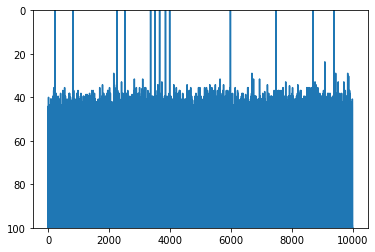

In [48]:
plt.plot(top_score)
plt.axis(ymin=100 , ymax= 0)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x30f1d928c8>,
 'caps': [<matplotlib.lines.Line2D at 0x30f1d92c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x30f1d8afc8>],
 'medians': [<matplotlib.lines.Line2D at 0x30f1d97908>],
 'fliers': [<matplotlib.lines.Line2D at 0x30f1d97f08>],
 'means': []}

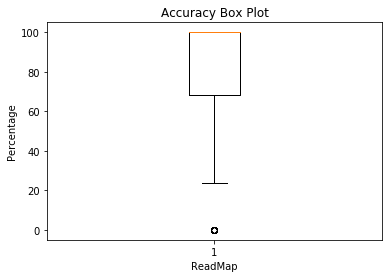

In [61]:
fig1, ax1 = plt.subplots()
ax1.set_title('Accuracy Box Plot')
ax1.set_ylabel('Percentage')
ax1.set_xlabel('ReadMap')
ax1.boxplot(top_score)

In [60]:
import numpy as np
#mean value
mean= np.mean(top_score)
#median value
median = np.median(top_score)


print('Mean: ' + str(mean))
print('Median: ' + str(median))

print("The 1st percentile is:   " + str(np.percentile(top_score, 1)))
print("The 10th percentile is:  " + str(np.percentile(top_score, 10)))
print("The 20th percentile is:  " + str(np.percentile(top_score, 20)))
print("The 30th percentile is:  " + str(np.percentile(top_score, 30)))
print("The 40th percentile is:  " + str(np.percentile(top_score, 40)))
print("The 50th percentile is:  " + str(np.percentile(top_score, 50)))
print("The 60th percentile is:  " + str(np.percentile(top_score, 60)))
print("The 70th percentile is:  " + str(np.percentile(top_score, 70)))
print("The 80th percentile is:  " + str(np.percentile(top_score, 80)))
print("The 90th percentile is:  " + str(np.percentile(top_score, 90)))
print("The 100th percentile is: " + str(np.percentile(top_score, 100)))

Mean: 85.29570033781314
Median: 100.0
The 1st percentile is:   36.84210526315789
The 10th percentile is:  43.42105263157895
The 20th percentile is:  50.0
The 30th percentile is:  93.42105263157895
The 40th percentile is:  98.68421052631578
The 50th percentile is:  100.0
The 60th percentile is:  100.0
The 70th percentile is:  100.0
The 80th percentile is:  100.0
The 90th percentile is:  100.0
The 100th percentile is: 100.0
